# Фильмы с данными из википедии

https://www.kaggle.com/jrobischon/wikipedia-movie-plots

1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам
2. Подготовьте sentiment analysis по отзывам (используя  nltk.classify) и оцените, как распределяется sentiment по актерам, режиссерам и жанрам

In [270]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [272]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')

## 1.  Анализ исходных данных

In [216]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


### Поле "Genre" (жанр)

In [342]:
df['Genre'].describe()

count       34886
unique       2265
top       unknown
freq         6083
Name: Genre, dtype: object

In [343]:
print(f"Кол-во NaN: {df['Genre'].isna().sum()}")

Кол-во NaN: 0


In [344]:
df['g_cnt'] = df['Genre']
top_ganres = df.groupby(['Genre'])['g_cnt'].count().sort_values(ascending=True).tail(21)
top_ganres

Genre
family              217
sci-fi              221
comedy, drama       236
animation           264
war                 273
mystery             310
film noir           345
science fiction     418
romantic comedy     461
crime drama         464
musical             467
adventure           526
crime               568
western             865
romance             923
thriller            966
action             1098
horror             1167
comedy             4379
drama              5964
unknown            6083
Name: g_cnt, dtype: int64

<AxesSubplot:ylabel='Genre'>

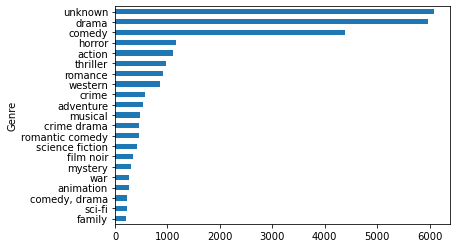

In [345]:
top_ganres.plot.barh()

In [346]:
print(f"Доля top_ganres: {top_ganres.sum()/df['Genre'].count():2.2f}")
print(f"Доля unknown: {top_ganres['unknown']/df['Genre'].count():2.2f}")

Доля top_ganres: 0.75
Доля unknown: 0.17


### Поле "Director" (Режиссер)

In [347]:
df['Director'].describe()

count       34886
unique      12593
top       Unknown
freq         1124
Name: Director, dtype: object

In [348]:
df['d_cnt'] = df['Director']
top_dir = df.groupby(['Director'])['d_cnt'].count().sort_values(ascending=True).tail(10)
top_dir

Director
Richard Thorpe         55
Norman Taurog          56
William A. Seiter      56
Allan Dwan             58
John Ford              59
Jules White            63
Lloyd Bacon            66
Hanna-Barbera          77
Michael Curtiz         79
Unknown              1124
Name: d_cnt, dtype: int64

<AxesSubplot:ylabel='Director'>

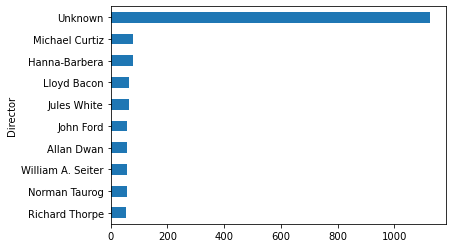

In [349]:
top_dir.plot.barh()

In [350]:
print(f"Доля top_directors: {top_dir.sum()/df['Director'].count():2.2f}")
print(f"Доля unknown: {top_dir['Unknown']/df['Director'].count():2.2f}")

Доля top_directors: 0.05
Доля unknown: 0.03


### Поле "Origin/Ethnicity" (Нац.принадлежность)

In [351]:
df['Origin/Ethnicity'].describe()

count        34886
unique          24
top       American
freq         17377
Name: Origin/Ethnicity, dtype: object

In [352]:
df['d_cnt'] = df['Origin/Ethnicity']
ethnic = df.groupby(['Origin/Ethnicity'])['d_cnt'].count().sort_values(ascending=True)
ethnic

Origin/Ethnicity
Maldivian           2
Assamese            9
Egyptian           67
Turkish            70
Malaysian          70
Punjabi            84
Bangladeshi        87
Filipino          128
Marathi           141
Russian           232
Bengali           306
Kannada           444
Chinese           463
South_Korean      522
Australian        576
Canadian          723
Hong Kong         791
Malayalam        1095
Japanese         1188
Telugu           1311
Tamil            2599
Bollywood        2931
British          3670
American        17377
Name: d_cnt, dtype: int64

<AxesSubplot:ylabel='Origin/Ethnicity'>

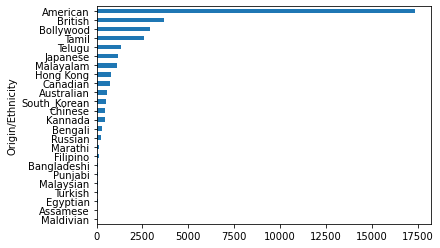

In [294]:
ethnic.plot.barh()

In [296]:
print(f"Доля American: {ethnic['American']/df['Origin/Ethnicity'].count():2.2f}")

Доля American: 0.50


### Поле "Release Year" (Год релиза)

In [300]:
df['Release Year'].astype(str).describe()

count     34886
unique      117
top        2013
freq       1021
Name: Release Year, dtype: object

In [309]:
df['d_cnt'] = df['Release Year']
top_years = df.groupby(['Release Year'])['d_cnt'].count().sort_values(ascending=True).tail(20)
all_years = df.groupby(['Release Year'])['d_cnt'].count().sort_index(ascending=True)
top_years

Release Year
1994     471
1996     475
1995     488
2002     492
1997     494
2003     514
2004     565
2005     575
2008     650
2015     661
2007     665
2016     721
2006     723
2009     745
2017     805
2010     825
2011     858
2012     874
2014     929
2013    1021
Name: d_cnt, dtype: int64

<AxesSubplot:xlabel='Release Year'>

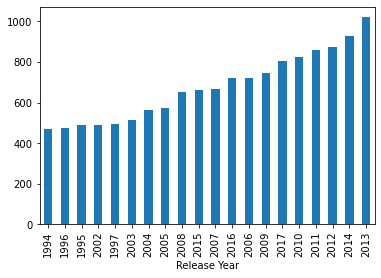

In [314]:
top_years.plot.bar()

In [313]:
print(f"Доля top_20_years: {top_years.sum()/all_years.sum():2.2f}")

Доля top_20_years: 0.39


<AxesSubplot:xlabel='Release Year'>

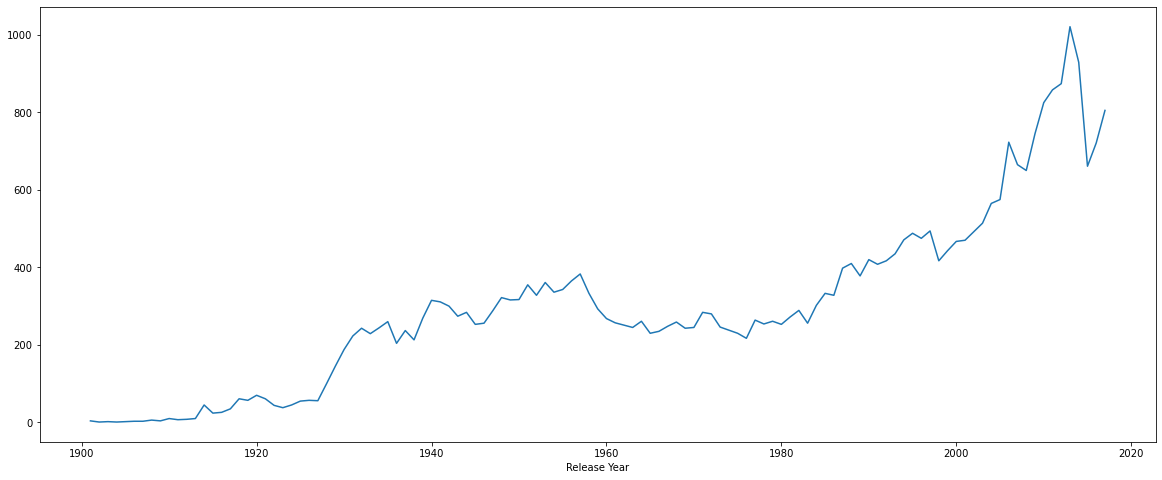

In [333]:
all_years.plot(figsize=(20,8))

## 2. Предсказание жанра фильма на основе его описания

### Предобработка данных

### Обучение модели

### Оценка качества модели

### Предсказание для df.Genre == 'unknown'

In [ ]:
применяем модель для набора df.Genre == 'unknown'

## Sentiment analysis

Где взять данные по отзывам? Представленные данные в Kaggle содержат только набор данных по фильмам без набора данных с отзывами по ним.

In [334]:
import nltk